<a href="https://colab.research.google.com/github/codedraco/IDS/blob/master/crop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import pandas as pd

In [0]:
dfc = pd.read_csv('/content/gdrive/My Drive/crop/crop1.csv')

dfc.head()

,State,District_Name,YEAR,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [0]:
dfc.shape

(246091, 7)

## Reading the file

In [0]:
dfrd = pd.read_csv('/content/gdrive/My Drive/crop/rainfall in india 1901-2015.csv')
dfrd


,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4111,LAKSHADWEEP,2011,5.1,2.8,3.1,85.9,107.2,153.6,350.2,254.0,255.2,117.4,184.3,14.9,1533.7,7.9,196.2,1013.0,316.6
4112,LAKSHADWEEP,2012,19.2,0.1,1.6,76.8,21.2,327.0,231.5,381.2,179.8,145.9,12.4,8.8,1405.5,19.3,99.6,1119.5,167.1
4113,LAKSHADWEEP,2013,26.2,34.4,37.5,5.3,88.3,426.2,296.4,154.4,180.0,72.8,78.1,26.7,1426.3,60.6,131.1,1057.0,177.6
4114,LAKSHADWEEP,2014,53.2,16.1,4.4,14.9,57.4,244.1,116.1,466.1,132.2,169.2,59.0,62.3,1395.0,69.3,76.7,958.5,290.5


In [0]:
print(dfrd.columns)
print(set(dfrd['SUBDIVISION']))

Index(['SUBDIVISION', 'YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL', 'Jan-Feb', 'Mar-May',
       'Jun-Sep', 'Oct-Dec'],
      dtype='object')
{'SOUTH INTERIOR KARNATAKA', 'ORISSA', 'TAMIL NADU', 'UTTARAKHAND', 'MATATHWADA', 'VIDARBHA', 'SUB HIMALAYAN WEST BENGAL & SIKKIM', 'BIHAR', 'LAKSHADWEEP', 'GANGETIC WEST BENGAL', 'PUNJAB', 'JAMMU & KASHMIR', 'WEST RAJASTHAN', 'JHARKHAND', 'RAYALSEEMA', 'NORTH INTERIOR KARNATAKA', 'HIMACHAL PRADESH', 'MADHYA MAHARASHTRA', 'KONKAN & GOA', 'NAGA MANI MIZO TRIPURA', 'ANDAMAN & NICOBAR ISLANDS', 'ASSAM & MEGHALAYA', 'WEST UTTAR PRADESH', 'COASTAL ANDHRA PRADESH', 'EAST RAJASTHAN', 'HARYANA DELHI & CHANDIGARH', 'GUJARAT REGION', 'COASTAL KARNATAKA', 'TELANGANA', 'SAURASHTRA & KUTCH', 'EAST MADHYA PRADESH', 'CHHATTISGARH', 'WEST MADHYA PRADESH', 'ARUNACHAL PRADESH', 'KERALA', 'EAST UTTAR PRADESH'}


In [0]:
valid_states_rain = dfrd[(dfrd['SUBDIVISION']=='BIHAR') | (dfrd['SUBDIVISION']=='KERALA') | (dfrd['SUBDIVISION']=='ARUNACHAL PRADESH')|(dfrd['SUBDIVISION']=='TAMIL NADU')|(dfrd['SUBDIVISION']=='JAMMU & KASHMIR')|(dfrd['SUBDIVISION']=='UTTARAKHAND')|(dfrd['SUBDIVISION']=='ORISSA')|(dfrd['SUBDIVISION']=='HIMACHAL PRADESH')|(dfrd['SUBDIVISION']=='LAKSHADWEEP')|(dfrd['SUBDIVISION']=='PUNJAB')|(dfrd['SUBDIVISION']=='CHHATTISGARH')|(dfrd['SUBDIVISION']=='ANDAMAN & NICOBAR ISLANDS')|(dfrd['SUBDIVISION']=='JHARKHAND')]

In [0]:
print(set(valid_states_rain['SUBDIVISION']))
print(valid_states_rain.head())
valid_states_rain = valid_states_rain[['SUBDIVISION','YEAR','ANNUAL']]
print(valid_states_rain.head())
print(valid_states_rain.describe())

{'LAKSHADWEEP', 'PUNJAB', 'JAMMU & KASHMIR', 'ORISSA', 'TAMIL NADU', 'JHARKHAND', 'UTTARAKHAND', 'CHHATTISGARH', 'HIMACHAL PRADESH', 'BIHAR', 'ARUNACHAL PRADESH', 'KERALA', 'ANDAMAN & NICOBAR ISLANDS'}
                 SUBDIVISION  YEAR   JAN  ...  Mar-May  Jun-Sep  Oct-Dec
0  ANDAMAN & NICOBAR ISLANDS  1901  49.2  ...    560.3   1696.3    980.3
1  ANDAMAN & NICOBAR ISLANDS  1902   0.0  ...    458.3   2185.9    716.7
2  ANDAMAN & NICOBAR ISLANDS  1903  12.7  ...    236.1   1874.0    690.6
3  ANDAMAN & NICOBAR ISLANDS  1904   9.4  ...    506.9   1977.6    571.0
4  ANDAMAN & NICOBAR ISLANDS  1905   1.3  ...    309.7   1624.9    630.8

[5 rows x 19 columns]
                 SUBDIVISION  YEAR  ANNUAL
0  ANDAMAN & NICOBAR ISLANDS  1901  3373.2
1  ANDAMAN & NICOBAR ISLANDS  1902  3520.7
2  ANDAMAN & NICOBAR ISLANDS  1903  2957.4
3  ANDAMAN & NICOBAR ISLANDS  1904  3079.6
4  ANDAMAN & NICOBAR ISLANDS  1905  2566.7
              YEAR       ANNUAL
count  1471.000000  1447.000000
mean   1958.611

## Taking Data After 1999 to sync with crop data

In [0]:
valid_states_rain = valid_states_rain[valid_states_rain['YEAR']>1999]

In [0]:
valid_states_rain.columns = ['State','YEAR','Rainfall']
valid_states_rain

,State,YEAR,Rainfall
94,ANDAMAN & NICOBAR ISLANDS,2000,2763.2
95,ANDAMAN & NICOBAR ISLANDS,2001,3080.9
96,ANDAMAN & NICOBAR ISLANDS,2002,2620.2
97,ANDAMAN & NICOBAR ISLANDS,2003,2355.9
98,ANDAMAN & NICOBAR ISLANDS,2004,2460.1
...,...,...,...
4111,LAKSHADWEEP,2011,1533.7
4112,LAKSHADWEEP,2012,1405.5
4113,LAKSHADWEEP,2013,1426.3
4114,LAKSHADWEEP,2014,1395.0


In [0]:
print(set(valid_states_rain['State']))
print(set(dfc['State']))

{'LAKSHADWEEP', 'PUNJAB', 'JAMMU & KASHMIR', 'ORISSA', 'TAMIL NADU', 'JHARKHAND', 'UTTARAKHAND', 'CHHATTISGARH', 'HIMACHAL PRADESH', 'BIHAR', 'ARUNACHAL PRADESH', 'KERALA', 'ANDAMAN & NICOBAR ISLANDS'}
{'Goa', 'Arunachal Pradesh', 'Rajasthan', 'Uttar Pradesh', 'Madhya Pradesh', 'Nagaland', 'Jammu and Kashmir ', 'Odisha', 'Bihar', 'Puducherry', 'Chandigarh', 'Jharkhand', 'Dadra and Nagar Haveli', 'Assam', 'Maharashtra', 'Andhra Pradesh', 'Karnataka', 'Chhattisgarh', 'Meghalaya', 'Kerala', 'Haryana', 'Tamil Nadu', 'Telangana ', 'Andaman and Nicobar Islands', 'Mizoram', 'Uttarakhand', 'Himachal Pradesh', 'Manipur', 'Sikkim', 'West Bengal', 'Gujarat', 'Tripura', 'Punjab'}


In [0]:
valid_states_crop = dfc[(dfc['State']=='Bihar') | (dfc['State']=='Kerala') | (dfc['State']=='Arunachal Pradesh')|(dfc['State']=='Tamil Nadu')|(dfc['State']=='Jammu and Kashmir ')|(dfc['State']=='Uttarakhand')|(dfc['State']=='Odisha')|(dfc['State']=='Himachal Pradesh')|(dfc['State']=='Punjab')|(dfc['State']=='Chhattisgarh')|(dfc['State']=='Andaman and Nicobar Islands')|(dfc['State']=='Jharkhand')]

In [0]:
valid_states_crop

,State,District_Name,YEAR,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
236473,Uttarakhand,UTTAR KASHI,2014,Whole Year,Onion,26.0,172.0
236474,Uttarakhand,UTTAR KASHI,2014,Whole Year,Pulses total,5346.0,4630.0
236475,Uttarakhand,UTTAR KASHI,2014,Whole Year,Rice,9919.0,16499.0
236476,Uttarakhand,UTTAR KASHI,2014,Whole Year,Sunflower,3.0,3.0


In [0]:
print(set(valid_states_crop['State']))
print(set(valid_states_rain['State']))

{'Jammu and Kashmir ', 'Odisha', 'Andaman and Nicobar Islands', 'Uttarakhand', 'Bihar', 'Himachal Pradesh', 'Chhattisgarh', 'Arunachal Pradesh', 'Jharkhand', 'Kerala', 'Punjab', 'Tamil Nadu'}
{'LAKSHADWEEP', 'PUNJAB', 'JAMMU & KASHMIR', 'ORISSA', 'TAMIL NADU', 'JHARKHAND', 'UTTARAKHAND', 'CHHATTISGARH', 'HIMACHAL PRADESH', 'BIHAR', 'ARUNACHAL PRADESH', 'KERALA', 'ANDAMAN & NICOBAR ISLANDS'}


In [0]:
valid_states_rain = valid_states_rain[valid_states_rain.State != 'LAKSHADWEEP']
valid_states_crop = valid_states_crop.replace('Jammu and Kashmir ','Jammu and Kashmir')
valid_states_rain = valid_states_rain.replace('UTTARAKHAND','Uttarakhand')
valid_states_rain = valid_states_rain.replace('ORISSA','Odisha')
valid_states_rain = valid_states_rain.replace('HIMACHAL PRADESH','Himachal Pradesh')
valid_states_rain = valid_states_rain.replace('JHARKHAND','Jharkhand')
valid_states_rain = valid_states_rain.replace('ARUNACHAL PRADESH','Arunachal Pradesh')
valid_states_rain = valid_states_rain.replace('TAMIL NADU','Tamil Nadu')
valid_states_rain = valid_states_rain.replace('CHHATTISGARH','Chhattisgarh')
valid_states_rain = valid_states_rain.replace('JAMMU & KASHMIR','Jammu and Kashmir')
valid_states_rain = valid_states_rain.replace('ANDAMAN & NICOBAR ISLANDS','Andaman and Nicobar Islands')
valid_states_rain = valid_states_rain.replace('BIHAR','Bihar')
valid_states_rain = valid_states_rain.replace('PUNJAB','Punjab')
valid_states_rain = valid_states_rain.replace('KERALA','Kerala')

In [0]:
print(set(valid_states_crop['State']))
print(set(valid_states_rain['State']))

{'Odisha', 'Andaman and Nicobar Islands', 'Uttarakhand', 'Bihar', 'Himachal Pradesh', 'Chhattisgarh', 'Arunachal Pradesh', 'Jharkhand', 'Kerala', 'Jammu and Kashmir', 'Punjab', 'Tamil Nadu'}
{'Odisha', 'Andaman and Nicobar Islands', 'Uttarakhand', 'Bihar', 'Himachal Pradesh', 'Chhattisgarh', 'Arunachal Pradesh', 'Jharkhand', 'Kerala', 'Jammu and Kashmir', 'Punjab', 'Tamil Nadu'}


## Merging Of Two Datasets

In [0]:
df1=pd.merge(valid_states_crop,valid_states_rain,how='inner',on=['YEAR','State'])
df1

,State,District_Name,YEAR,Season,Crop,Area,Production,Rainfall
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,2763.2
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0,2763.2
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0,2763.2
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0,2763.2
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0,2763.2
...,...,...,...,...,...,...,...,...
67389,Uttarakhand,UTTAR KASHI,2014,Whole Year,Onion,26.0,172.0,1287.4
67390,Uttarakhand,UTTAR KASHI,2014,Whole Year,Pulses total,5346.0,4630.0,1287.4
67391,Uttarakhand,UTTAR KASHI,2014,Whole Year,Rice,9919.0,16499.0,1287.4
67392,Uttarakhand,UTTAR KASHI,2014,Whole Year,Sunflower,3.0,3.0,1287.4


## Correlation Between Elements Using HeatMap

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[Text(0.5, 0, 'YEAR'),
 Text(1.5, 0, 'Area'),
 Text(2.5, 0, 'Production'),
 Text(3.5, 0, 'Rainfall')]

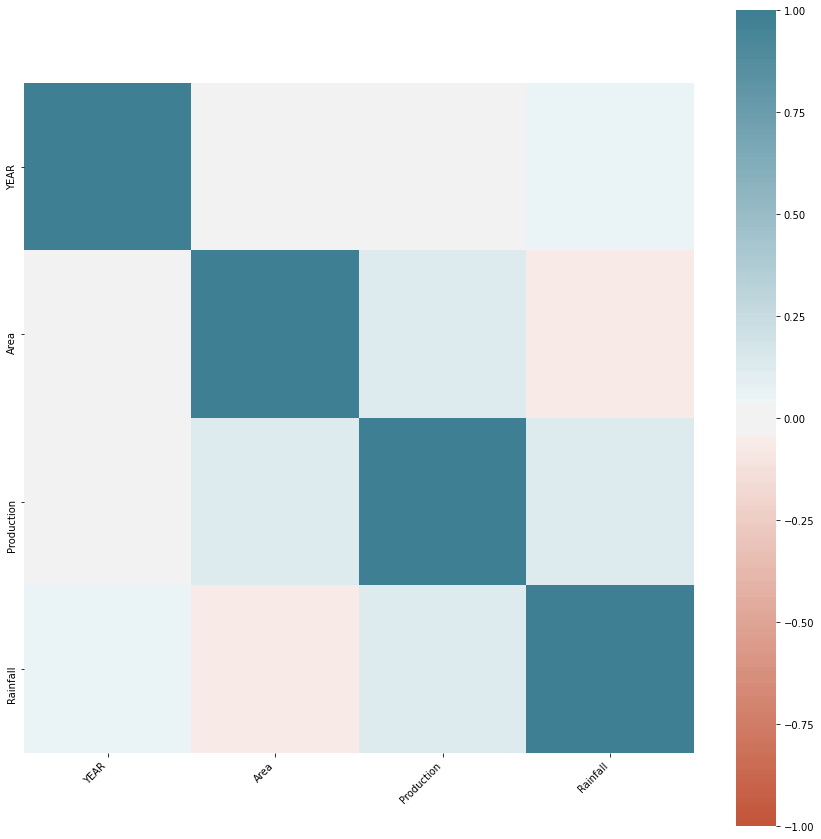

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
corr = df1.corr()
plt.subplots(figsize=(15,15))
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200),square=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right')

## Annual Performance Of Crop In State

Text(0, 0.5, 'Performance')

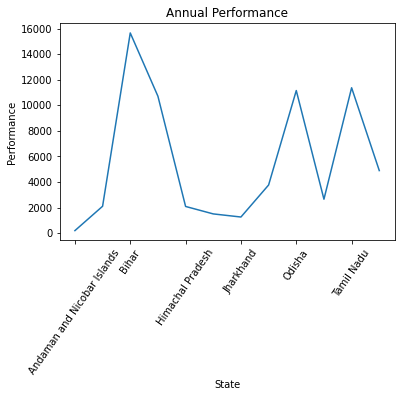

In [0]:
perf_by_year=df1.groupby('State').size()
plot_by_year=perf_by_year.plot(title="Annual Performance",rot=55)
plot_by_year.set_xlabel('State')
plot_by_year.set_ylabel('Performance')

## Scatter plot of Production with Rainfall of specific crop

2283
                 State District_Name  YEAR  ...   Area Production  Rainfall
206  Arunachal Pradesh         ANJAW  2004  ...   30.0       60.0    2545.7
215  Arunachal Pradesh     CHANGLANG  2004  ...  210.0      401.0    2545.7
231  Arunachal Pradesh   EAST KAMENG  2004  ...   20.0       32.0    2545.7
238  Arunachal Pradesh    EAST SIANG  2004  ...  500.0     1000.0    2545.7
248  Arunachal Pradesh  KURUNG KUMEY  2004  ...   15.0       16.0    2545.7

[5 rows x 8 columns]
                   State    District_Name  YEAR  ... Area Production  Rainfall
700    Arunachal Pradesh  LOWER SUBANSIRI  2007  ...  2.0        3.0    3020.7
26113       Chhattisgarh          BIJAPUR  2007  ...  2.0        3.0    1281.2
37112             Kerala           IDUKKI  2014  ...  1.0        3.0    3046.4
42876             Odisha        KANDHAMAL  2006  ...  3.0        3.0    1716.9

[4 rows x 8 columns]


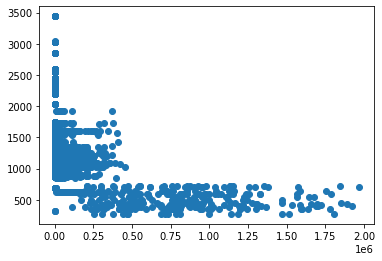

In [0]:
import matplotlib.pyplot as plt

wheat_data = df1[df1['Crop']=='Wheat']
print(len(wheat_data))
print(wheat_data.head())
print(wheat_data[wheat_data['Production']==3.0])
plt.scatter(wheat_data['Production'],wheat_data['Rainfall'])

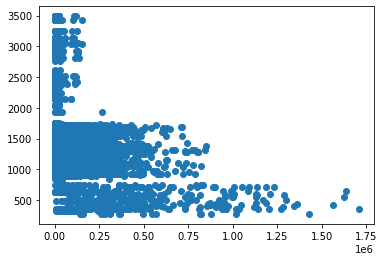

In [0]:
potato_data = df1[df1['Crop']=='Rice']
plt.scatter(potato_data['Production'],potato_data['Rainfall'])

In [0]:
df_arun = df1.drop(['State','District_Name','Season','Crop'], axis=1)
df_arun

,YEAR,Area,Production,Rainfall
0,2000,1254.0,2000.0,2763.2
1,2000,2.0,1.0,2763.2
2,2000,102.0,321.0,2763.2
3,2000,176.0,641.0,2763.2
4,2000,720.0,165.0,2763.2
...,...,...,...,...
67389,2014,26.0,172.0,1287.4
67390,2014,5346.0,4630.0,1287.4
67391,2014,9919.0,16499.0,1287.4
67392,2014,3.0,3.0,1287.4


## Converting in to categorical data

In [0]:
per = lambda x:((0,1)[x > 10000])
df_arun['Perf'] = df_arun['Production'].apply(per)
df_arun[['Perf','Production']]
df_arun.isnull().sum()

YEAR             0
Area             0
Production    1043
Rainfall         0
Perf             0
dtype: int64

In [0]:
df_arun = df_arun[['YEAR','Area','Perf','Rainfall']]
df_arun

,YEAR,Area,Perf,Rainfall
0,2000,1254.0,0,2763.2
1,2000,2.0,0,2763.2
2,2000,102.0,0,2763.2
3,2000,176.0,0,2763.2
4,2000,720.0,0,2763.2
...,...,...,...,...
67389,2014,26.0,0,1287.4
67390,2014,5346.0,0,1287.4
67391,2014,9919.0,1,1287.4
67392,2014,3.0,0,1287.4


In [0]:
df_arun.isnull().sum()

YEAR        0
Area        0
Perf        0
Rainfall    0
dtype: int64

## Building Model

In [0]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(df_arun.drop('Perf', axis=1), df_arun['Perf'], test_size=0.4, random_state=42)

In [0]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
#model = SVC(kernel ='linear', random_state = 13)
model = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state=13)
#model = GradientBoostingClassifier(random_state=13)
#model = LogisticRegression(random_state=13)
#model = MLPClassifier(random_state=13)
model.fit(train_x, train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=13, verbose=0,
                       warm_start=False)

In [0]:
pred_y = model.predict(test_x)
model.score(test_x, test_y)

0.9071518658654203

## Confused Matrix of the model

In [0]:
print(pred_y)

[1 0 0 ... 0 0 0]


In [0]:
print(test_y)

13124    1
18182    0
16382    0
52702    1
29280    0
        ..
43653    0
5449     0
15429    1
43018    0
25639    0
Name: Perf, Length: 26958, dtype: int64


In [0]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(test_y, pred_y)
cm

array([[21291,  1204],
       [ 1299,  3164]])

In [0]:
from sklearn import metrics
metrics.accuracy_score(test_y,pred_y)

0.9071518658654203

# Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC)

In [0]:
 from sklearn.metrics import roc_auc_score
probabilities = model.predict_proba(test_x)

In [0]:
roc_auc_score(test_y, probabilities[:, 1])

0.9243581851061882

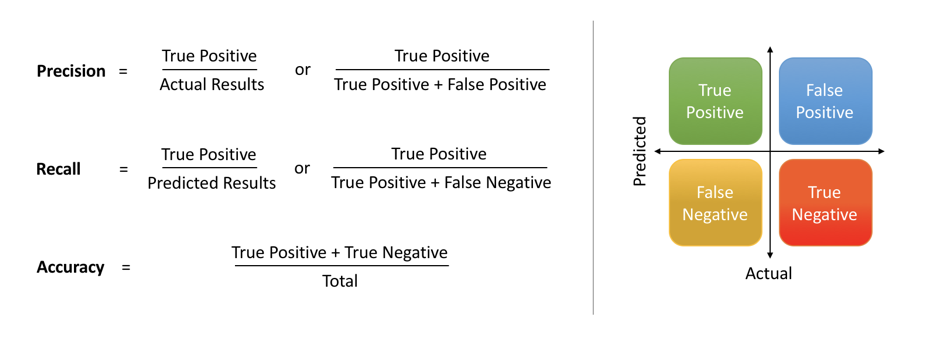

## Precision means the percentage of your results which are relevant.

In [0]:
from sklearn.metrics import precision_score

train_predictions = model.predict(train_x)
precision_score(train_y, train_predictions)

0.9957742227588289

## recall refers to the percentage of total relevant results correctly classified by your algorithm

In [0]:
from sklearn.metrics import recall_score

recall_score(train_y, train_predictions)

0.9777711914641375

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

 The best value is 1 and the worst value is 0.

Text(0, 0.5, 'True Positive Rate')

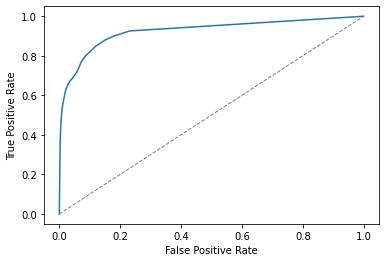

In [0]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(test_y, probabilities[:, 1])
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color='grey', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')